Лосев В.А. ФН12-21м Вариант 6

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv(r'C:\Users\Acer\Documents\FN12\lin_regr_05.txt',sep=" ")
data.columns=['x','y']

In [3]:
data.head(10)

,x,y
0,0.06,-1.5735
1,0.12,-2.6422
2,0.18,-2.8779
3,0.24,-2.2401
4,0.30,-0.9333
5,0.36,0.6503
6,0.42,2.0521
7,0.48,2.8479
8,0.54,2.8860
9,0.60,2.2394


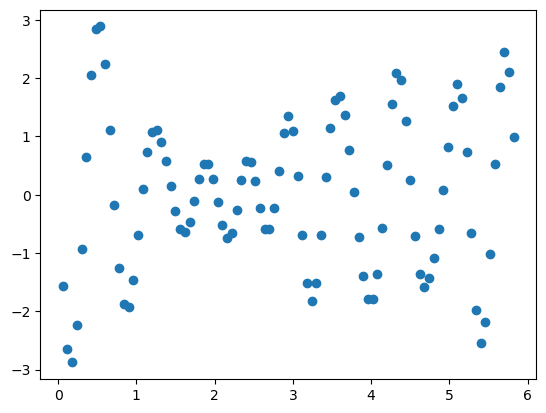

In [4]:
plt.scatter(data['x'],data['y'])

In [5]:
import math

Определим функции из спремляющего пространтсва

In [6]:


K=math.floor((data.shape[0]/3))
print(K)

32


In [7]:
T=round(data['x'][2]-data['x'][1],4)
T

0.06

In [8]:
l=len(data['x'])
print(l)

97


In [9]:

def funcsystem(t):
    functions=[]
    functions.append(math.exp(((t-data['x'][0]/T)**2)*(-0.5)))
    for i in range(1,K):
        functions.append(math.exp((((t-data['x'][i*3-1])/T)**2)*(-0.5)))
        
    return functions    

In [10]:
#получим матрицу признаков
matr=np.zeros((l,K))
for i in range(l):
    matr[i]=funcsystem(data['x'][i])
    

In [11]:
matr

array([[6.42878198e-01, 1.35335283e-01, 3.72665317e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.78955290e-01, 6.06530660e-01, 3.35462628e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.14480195e-01, 1.00000000e+00, 1.11089965e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.59667839e-05, 0.00000000e+00, 0.00000000e+00, ...,
        1.26641655e-14, 3.72665317e-06, 1.35335283e-01],
       [1.20216664e-05, 0.00000000e+00, 0.00000000e+00, ...,
        2.57675711e-18, 1.52299797e-08, 1.11089965e-02],
       [9.01879342e-06, 0.00000000e+00, 0.00000000e+00, ...,
        1.92874985e-22, 2.28973485e-11, 3.35462628e-04]])

In [12]:
n=len(data['x'].to_numpy())
print(n)

97


Решение первой системы при использовании разложения Холецкого

In [13]:
def solvefirstslay(a,y,K):
    x=[0 for i in range(K)]
    x[-1]=y[-1]/a[-1][-1]
    #sumx=0
    for i in range(K-1,-1,-1):#тут n-1,-1,1
        sumx=0
        for j in range(i+1,K): #тут i+1,#n
        
            sumx+=a[i][j]*x[j]
            x[i]=(y[i]-sumx)/a[i][i]
    return x     

In [14]:
def matmul(A,B):
    nA=len(A)#кол-во строк первой матрицы
    mA=len(A[0])#кол-во столбцов первой матрицы
    nB=len(B)#кол-во строк второй матрицы
    mB=len(B[0])#кол-во столбцов первой матрицы
    multiResult=[[0 for i in range(mB)] for j in range(nA)]
    for i in range(nA):
        for j in range(mB):
            for k in range(nB):
                multiResult[i][j] += A[i][k] * B[k][j]
    return multiResult




In [15]:
def vectmatmul(A,y): #в случае умножения матрицы на numpy-массив
    nA=len(A)#кол-во строк первой матрицы
    mA=len(A[0])#кол-во столбцов первой матрицы
    nB=y.size#кол-во элементов массива
   # mB=len(B[0])#кол-во столбцов первой матрицы
    multiResult=[0 for j in range(nA)]
    for i in range(nA):
        for j in range(nB):
            
            multiResult[i] += A[i][j] * y[j]
    return multiResult

In [16]:
A=[[1,6,2],[9,4,5],[5,0,3]]
B=np.array([3,8,5])
print(vectmatmul(A,B))

[61, 84, 30]


Решение второй системы для нахождения вектора значений x

In [17]:
def solvesecondslay(a,y,K):
    x=[i for i in range(K)]
    x[0]=y[0]/a[0][0]
    sumx=0
    for i in range(1,K):#(1,n)
        sumx=0
        for j in range(0,i):
        
            sumx+=a[i][j]*x[j]
            x[i]=(y[i]-sumx)/a[i][i]
    return x       

In [18]:
def matrtranspose(matrix,n,m):
    tr=np.array([[0 for i in range(m) ] for j in range(n)])
    for i in range(n):
        for j in range(m):
            tr[i][j]=matrix[j][i]
    return  tr

In [19]:
totalres=0


totalres=sc.linalg.cholesky(matmul(matr.T,matr))

In [20]:

firstslay=solvefirstslay(totalres,vectmatmul(matr.T,data['y']),K)
finalresult=solvesecondslay(totalres.T,firstslay,K)




In [21]:

massiv=[]
for i in np.arange(0,6,0.01):
    massiv.append(np.dot(funcsystem(i),finalresult))

Полученный результат

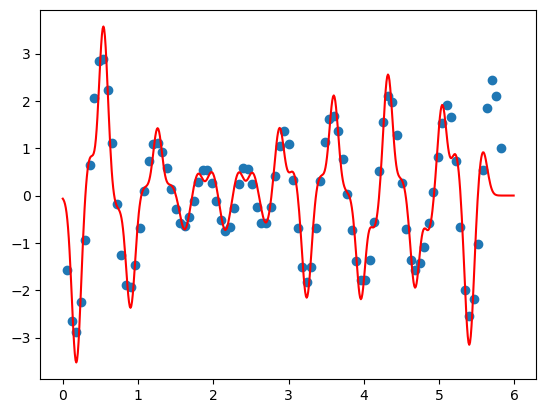

In [22]:
plt.scatter(data['x'],data['y'])

plt.plot(np.arange(0,6,0.01),massiv,color=(1,0,0))

Оценки остаточной дисперсии и матрицы ковариации

In [23]:

sigm2=0
for i in range(n):
    sigm2+=(data['y'][i]-np.dot(funcsystem(i),finalresult))**2
    
sigm2=sigm2/(n-K)
print(f'sigma^2={sigm2}')

sigma^2=2.6176798951819276


In [24]:
covmat=sigm2*np.linalg.inv(matmul(matr.T,matr))
covmat

array([[ 2.75482807e+00, -2.49649007e+00, -2.60185747e+00, ...,
        -4.29062666e-04, -1.96715947e-04, -9.17184708e-05],
       [-2.49649007e+00,  3.75596671e+00,  2.19870666e+00, ...,
         3.88826691e-04,  1.78268623e-04,  8.31174381e-05],
       [-2.60185747e+00,  2.19870666e+00,  3.96782438e+00, ...,
         4.05237595e-04,  1.85792668e-04,  8.66255107e-05],
       ...,
       [-4.29062666e-04,  3.88826691e-04,  4.05237595e-04, ...,
         1.51063057e+00, -1.60933881e-01,  1.67723884e-02],
       [-1.96715947e-04,  1.78268623e-04,  1.85792668e-04, ...,
        -1.60933881e-01,  1.51044215e+00, -1.59146629e-01],
       [-9.17184708e-05,  8.31174381e-05,  8.66255107e-05, ...,
         1.67723884e-02, -1.59146629e-01,  1.49348336e+00]])

In [25]:
def matrtranspose(matrix,n,m):
    tr=np.array([[0 for i in range(m) ] for j in range(n)])
    for i in range(n):
        for j in range(m):
            tr[i][j]=matrix[j][i]
    return  tr   

In [26]:

#Задание 2
data2=pd.read_csv(r'C:\Users\Acer\Documents\FN12\svm_08.txt',sep=" ")
data2.columns=['x','y','labels']

In [27]:
data2.head()

,x,y,labels
0,"(-4.172616860152805529,",2.833352012127022590);,-1
1,"(-3.416728713172945575,",2.351908736762950092);,-1
2,"(1.108897540218610756,",0.207458479638210597);,1
3,"(-2.025220981104188134,",3.025074065590016126);,-1
4,"(0.070942310344944415,",1.323907685509638998);,1


In [28]:
data2['x']=data2['x'].apply(lambda x:x.lstrip('(').rstrip(','))
data2['y']=data2['y'].apply(lambda x:x.rstrip(');'))

In [29]:
data2.head(10)

,x,y,labels
0,-4.172616860152805529,2.833352012127022590,-1
1,-3.416728713172945575,2.351908736762950092,-1
2,1.108897540218610756,0.207458479638210597,1
3,-2.025220981104188134,3.025074065590016126,-1
4,0.070942310344944415,1.323907685509638998,1
5,-3.611438986662380835,2.766982877129341212,-1
6,2.067335967543106001,-1.403965006588862252,1
7,1.682393738090121271,-0.469672055702129276,1
8,-1.775218722729108300,1.750100814230383772,-1
9,-3.189530681586797201,3.094746345620624783,-1


In [30]:

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       49 non-null     object
 1   y       49 non-null     object
 2   labels  49 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [31]:
data2['x']=data2['x'].astype('float')
data2['y']=data2['y'].astype('float')


In [32]:
x1=data2['x'].to_numpy()

In [33]:
x2=data2['y'].to_numpy()

In [34]:
labels=data2['labels'].to_numpy()
labels

array([-1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,
        1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1],
      dtype=int64)

In [35]:
truelabel=data2.query('labels==1')
falselabel=data2.query('labels==-1')

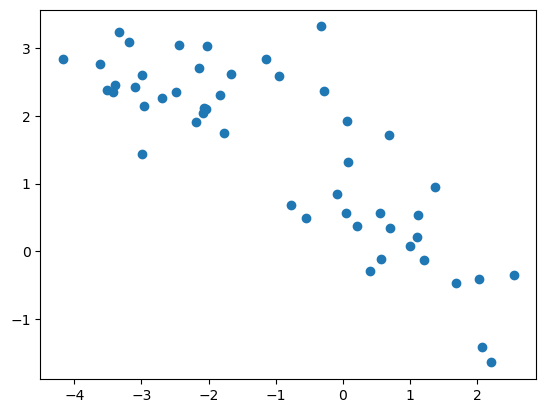

In [36]:
plt.scatter(data2['x'],data2['y'])

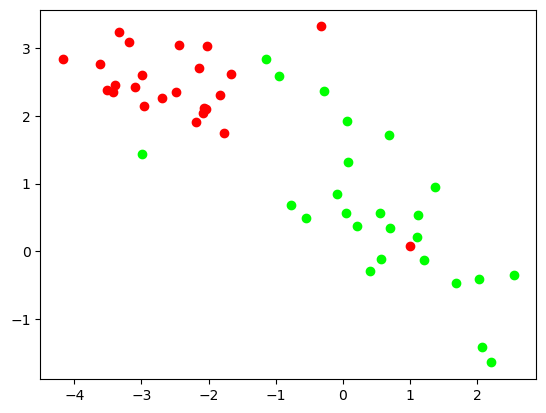

In [37]:
#исходные данные 
plt.scatter(truelabel['x'],truelabel['y'],color=(0,1,0));
plt.scatter(falselabel['x'],falselabel['y'],color=(1,0,0));
plt.show()

In [38]:
n=len(data2['x'])

In [39]:
points=np.array([[x1[i],x2[i]] for i in range(n)])

In [40]:
np.dot(points[1],points[2])

-3.300878654855113

In [41]:
len(data2['x'])

49

In [42]:
#решение двойственной задачи

In [43]:
C=1

def dualproblemmax(lambd):
    sm=lambd.sum()
    totsum=0
    mainsum=0
    for i in range(n):
        for j in range(n):
            if i==j:
                mainsum+=0.5*labels[i]*labels[j]*lambd[i]*lambd[j]*np.dot(points[i],points[j]) 
            else:
                mainsum+=0.5*labels[i]*labels[j]*lambd[i]*lambd[j]*(np.dot(points[i],points[j]) +1/C)
    totsum=sm-mainsum
    return -totsum
                
            

In [44]:
from scipy.optimize import minimize

In [45]:
def fun(lambd):
    return np.dot(labels,lambd)-C

In [46]:
lambda0=np.zeros(n)
bounds=[(0,C) for i in range(n)]
constraints={'type':'eq','fun':fun} 
rez=minimize(dualproblemmax,lambda0,bounds=bounds,constraints=constraints,method='SLSQP')

In [47]:
result=rez.x
result

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.51407110e-11,
       1.54163716e-09, 0.00000000e+00, 6.93816062e-12, 0.00000000e+00,
       1.00000000e+00, 1.60381586e-12, 1.00000000e+00, 1.00000000e+00,
       9.99999998e-01, 0.00000000e+00, 6.10197429e-01, 0.00000000e+00,
       3.16202997e-10, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.10197416e-01, 1.00000000e+00, 1.00000000e+00, 1.22004145e-10,
       7.83241157e-12, 9.01157026e-12, 1.00000000e+00, 0.00000000e+00,
       2.57830280e-12, 1.04506885e-10, 1.09556463e-10, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       2.25815424e-12, 5.79129565e-11, 6.62347184e-12, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00])

In [48]:
sv=result>0.001

In [49]:
sv

array([False, False, False, False, False, False, False, False,  True,
       False,  True,  True,  True, False,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False,  True, False, False, False, False,  True,
        True, False, False,  True])

In [50]:
#находим индексы опорных векторов

In [51]:
svlabel=data2['labels'][sv].index

In [52]:
svlabel

Index([8, 10, 11, 12, 14, 20, 21, 22, 26, 34, 35, 39, 44, 45, 48], dtype='int64')

In [53]:
#data2['x'][svlabel]

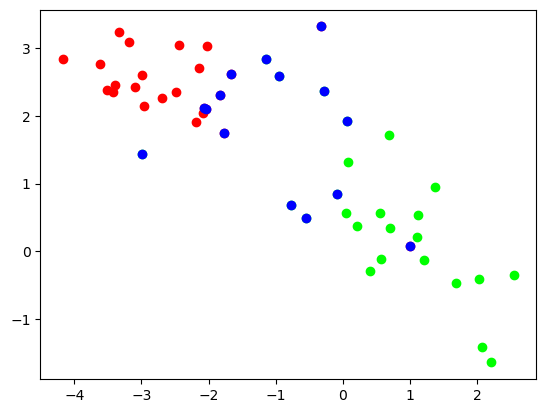

In [54]:
plt.scatter(truelabel['x'],truelabel['y'],color=(0,1,0));
plt.scatter(falselabel['x'],falselabel['y'],color=(1,0,0));
plt.scatter(data2['x'][svlabel],data2['y'][svlabel],color=(0,0,1));#опорные вектора
plt.show()

In [55]:
ov=result[result>0.01]
ov

array([1.        , 1.        , 1.        , 1.        , 0.61019743,
       0.61019742, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [56]:
npy=data2['y'][svlabel].reset_index(drop='True').to_numpy()
npy

array([1.75010081, 3.31758399, 2.58416187, 2.09546783, 2.1224336 ,
       0.8531029 , 2.61370944, 1.92215838, 2.84015081, 1.43007152,
       0.67949717, 2.36203373, 0.07359479, 0.48741337, 2.30752975])

In [57]:
npx=data2['x'][svlabel].reset_index(drop='True').to_numpy()
npx

array([-1.77521872, -0.32652952, -0.9542336 , -2.03197243, -2.06444589,
       -0.07998159, -1.66890647,  0.06742314, -1.13837034, -2.99485505,
       -0.77038363, -0.2869609 ,  0.99537473, -0.54361695, -1.82455597])

In [58]:
npl=data2['labels'][svlabel].reset_index(drop='True').to_numpy()
npl

array([-1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1],
      dtype=int64)

In [59]:
#np.dot((1,2),(3,3))

In [60]:
# Построим оптимальную разделяющую гиперплоскость
def hyperpl(data,x):
    res=0
    for i in range(len(ov)):
        res+=npl[i]*ov[i]*np.dot((npx[i],npy[i]),(x))
    return res    

In [61]:
hyperpl(data2,(1,2))

-0.03235812003672445

In [62]:
hyperpl(data2,(-3,3))

-5.546304543031509

In [63]:
res=0
for i in range(len(ov)):
    res+=npl[i]*ov[i]*np.array([npx[i],npy[i]])


In [64]:
res

array([ 1.22172608, -0.6270421 ])

Теперь найдем b и вектор весов
Найдем вектор весов как линейную комбинацию опорных векторов
$$w=\sum_i^k(y_i \lambda_i \vec{x_i})$$
Тогда потом b найдем из условия 
$$y_i f(\vec(x_i)+b)=1-\frac{\lambda_i}{C}$$
Тогда для первого вектора получим b=3.266

In [65]:

resf=0
for i in range(len(ov)):
    resf+=npl[i]*ov[i]*np.dot((npx[i],npy[i]),(npx[0],npy[0]))
resf    

-3.266217902814266

In [66]:

b=npl[0]*resf


данные и разделяющая гиперплоскость

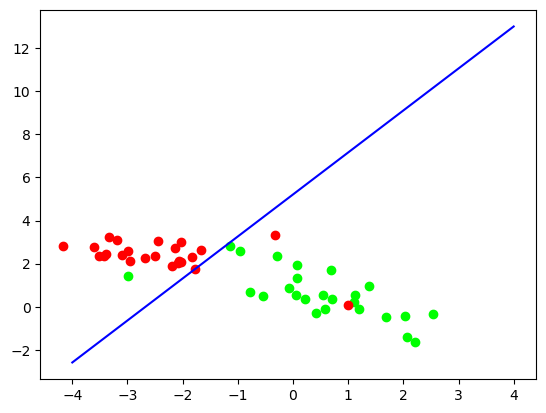

In [67]:
plt.scatter(truelabel['x'],truelabel['y'],color=(0,1,0));
plt.scatter(falselabel['x'],falselabel['y'],color=(1,0,0));

plt.plot(np.linspace(-4,4,50),(res[0]/(-res[1]))*np.linspace(-4,4,50)+b/(-res[1]),color=(0,0,1))

plt.show()